<a href="https://colab.research.google.com/github/Pavani1604/bharathinterns/blob/main/credit_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [ ]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [ ]:
fraud = data[data["Class"]==1]
valid = data[data['Class']==0]
outfun = len(fraud)/float(len(valid))
print(outfun)

0.0017304750013189597


In [ ]:
print("fraud cases {}".format(len(data[data["Class"]==1])))
print("Valid Transaction {}".format(len(data[data["Class"]==0])))

fraud cases 492
Valid Transaction 284315


In [ ]:
print("amount details of fraud cases")
fraud.Amount.describe

amount details of fraud cases


<bound method NDFrame.describe of 541         0.00
623       529.00
4920      239.93
6108       59.00
6329        1.00
           ...  
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, Length: 492, dtype: float64>

In [ ]:
print("amount details of valid transactions")
valid.Amount.describe

amount details of valid transactions


<bound method NDFrame.describe of 0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284315, dtype: float64>

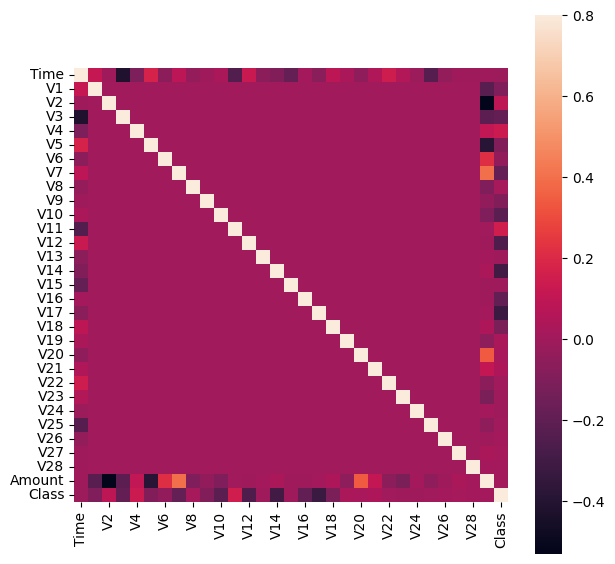

In [ ]:
cormat = data.corr()
fig = plt.figure(figsize=(7,7))
sns.heatmap(cormat,vmax=.8,square=True)
plt.show()

In [ ]:
x = data.drop(["Class"],axis=1)
y = data["Class"]
xdata = x.values
ydata = y.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xdata,ydata,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnc = RandomForestClassifier()
rnc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
ypred = rnc.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (ypred != y_test).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(y_test, ypred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, ypred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, ypred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, ypred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, ypred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995962220427653
The precision is 0.987012987012987
The recall is 0.7755102040816326
The F1-Score is 0.8685714285714285
The Matthews correlation coefficient is0.8747121626683524


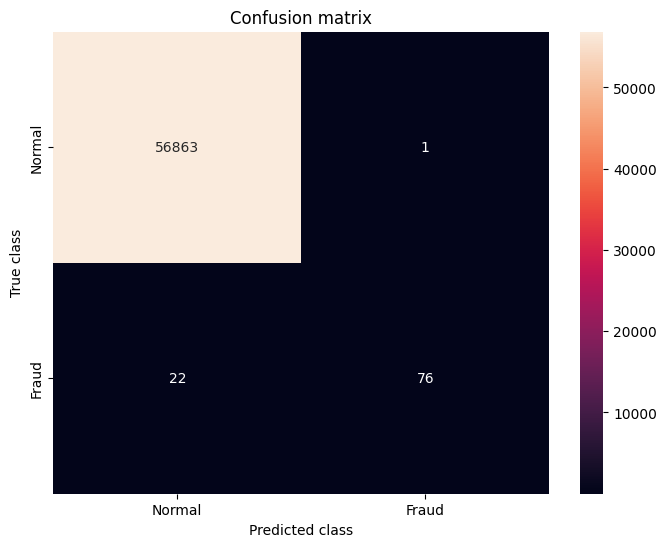

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, ypred)
plt.figure(figsize =(8,6))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Decision Tree

In [ ]:
from sklearn.preprocessing import StandardScaler
sk = StandardScaler()
x_train = sk.fit_transform(x_train)
x_test = sk.transform(x_test)
print(x_train,x_test)

[[ 1.02255459  0.99785119 -0.22962626 ...  0.11248883 -0.14374055
  -0.30788875]
 [ 0.47128275 -0.205221   -0.37821992 ... -0.92189789 -0.43984143
  -0.1670264 ]
 [ 1.15338663  0.03655821  0.49556347 ...  0.51372993  0.21235767
  -0.30004345]
 ...
 [-0.31581527 -0.07533181  0.59962034 ... -0.3013968  -0.59571596
  -0.33162078]
 [-0.1444891  -1.50615534  1.42172842 ...  1.23673372  1.01755287
  -0.34315338]
 [-0.38770656  0.62923844 -0.47354037 ...  0.00310728  0.11623211
   0.0961834 ]] [[-1.122118   -8.43953559  5.18252006 ... -5.02350367 -3.16294175
   1.0815138 ]
 [-1.06408273  0.1730534  -1.65602032 ...  0.10210496  0.30863538
   1.69317258]
 [-1.24890694  0.71421679 -0.35634288 ...  0.02847206  0.013272
  -0.22547388]
 ...
 [ 1.00442384  0.02018331 -0.06601034 ...  0.89063984  1.0738269
  -0.31714621]
 [-0.75040591 -0.25325795  0.59873588 ...  0.10094377 -0.81883767
  -0.33299371]
 [-0.96715373 -0.81263064  0.59930001 ...  0.31303049 -1.8421089
   3.2080607 ]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion="entropy",random_state=0)
dc.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
dc_pred = dc.predict(x_test)
acc = accuracy_score(y_test, dc_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, dc_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, dc_pred)
print("The recall is {}".format(rec))



The accuracy is 0.9991924440855307
The precision is 0.76
The recall is 0.7755102040816326


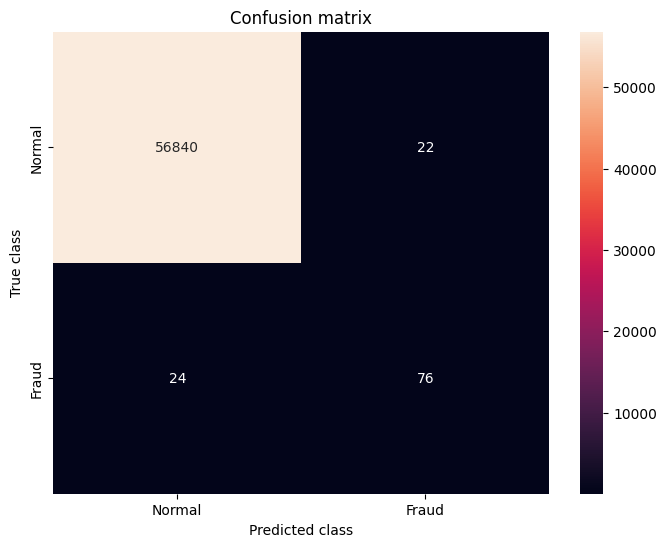

In [ ]:
cm = confusion_matrix(dc_pred,y_test)

plt.figure(figsize =(8,6))
sns.heatmap(cm, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()